In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', font_scale=1.5)

In [36]:
## Калибровка

termopara_V = np.array([41, 34.8, 35.85, 37.1])
pirometr_T = np.array([1060, 900, 931, 959])
termopara_T = np.array(([1010, 855, 880, 910]))
percenteges = (1 - termopara_T/pirometr_T) * 100
print("Отклонения в процентах температуры пирометра от температуры термопары:\n",percenteges)

Отклонения в процентах температуры пирометра от температуры термопары:
 [4.71698113 5.         5.47798067 5.10948905]


In [37]:
## Яркостная температура колец разная

In [38]:
## Лампа
temp_lampa = np.array([910, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800]) #C
V_lampa = np.array([1.605, 1.976, 2.359, 2.916, 3.390, 3.892, 5.374, 5.824, 7.531, 8.618]) #Volts
I_lampa = np.array([0.507, 0.547, 0.587, 0.640, 0.684, 0.729, 0.849, 0.882, 1, 1.073]) #Ampers
assert V_lampa.size == temp_lampa.size, "sizes of arrays are not equal"

W = V_lampa * I_lampa
x = np.log(temp_lampa)
y_raw = np.log(W)

pn = np.polyfit(x, y_raw, 1)
y = np.polyval(pn, x)

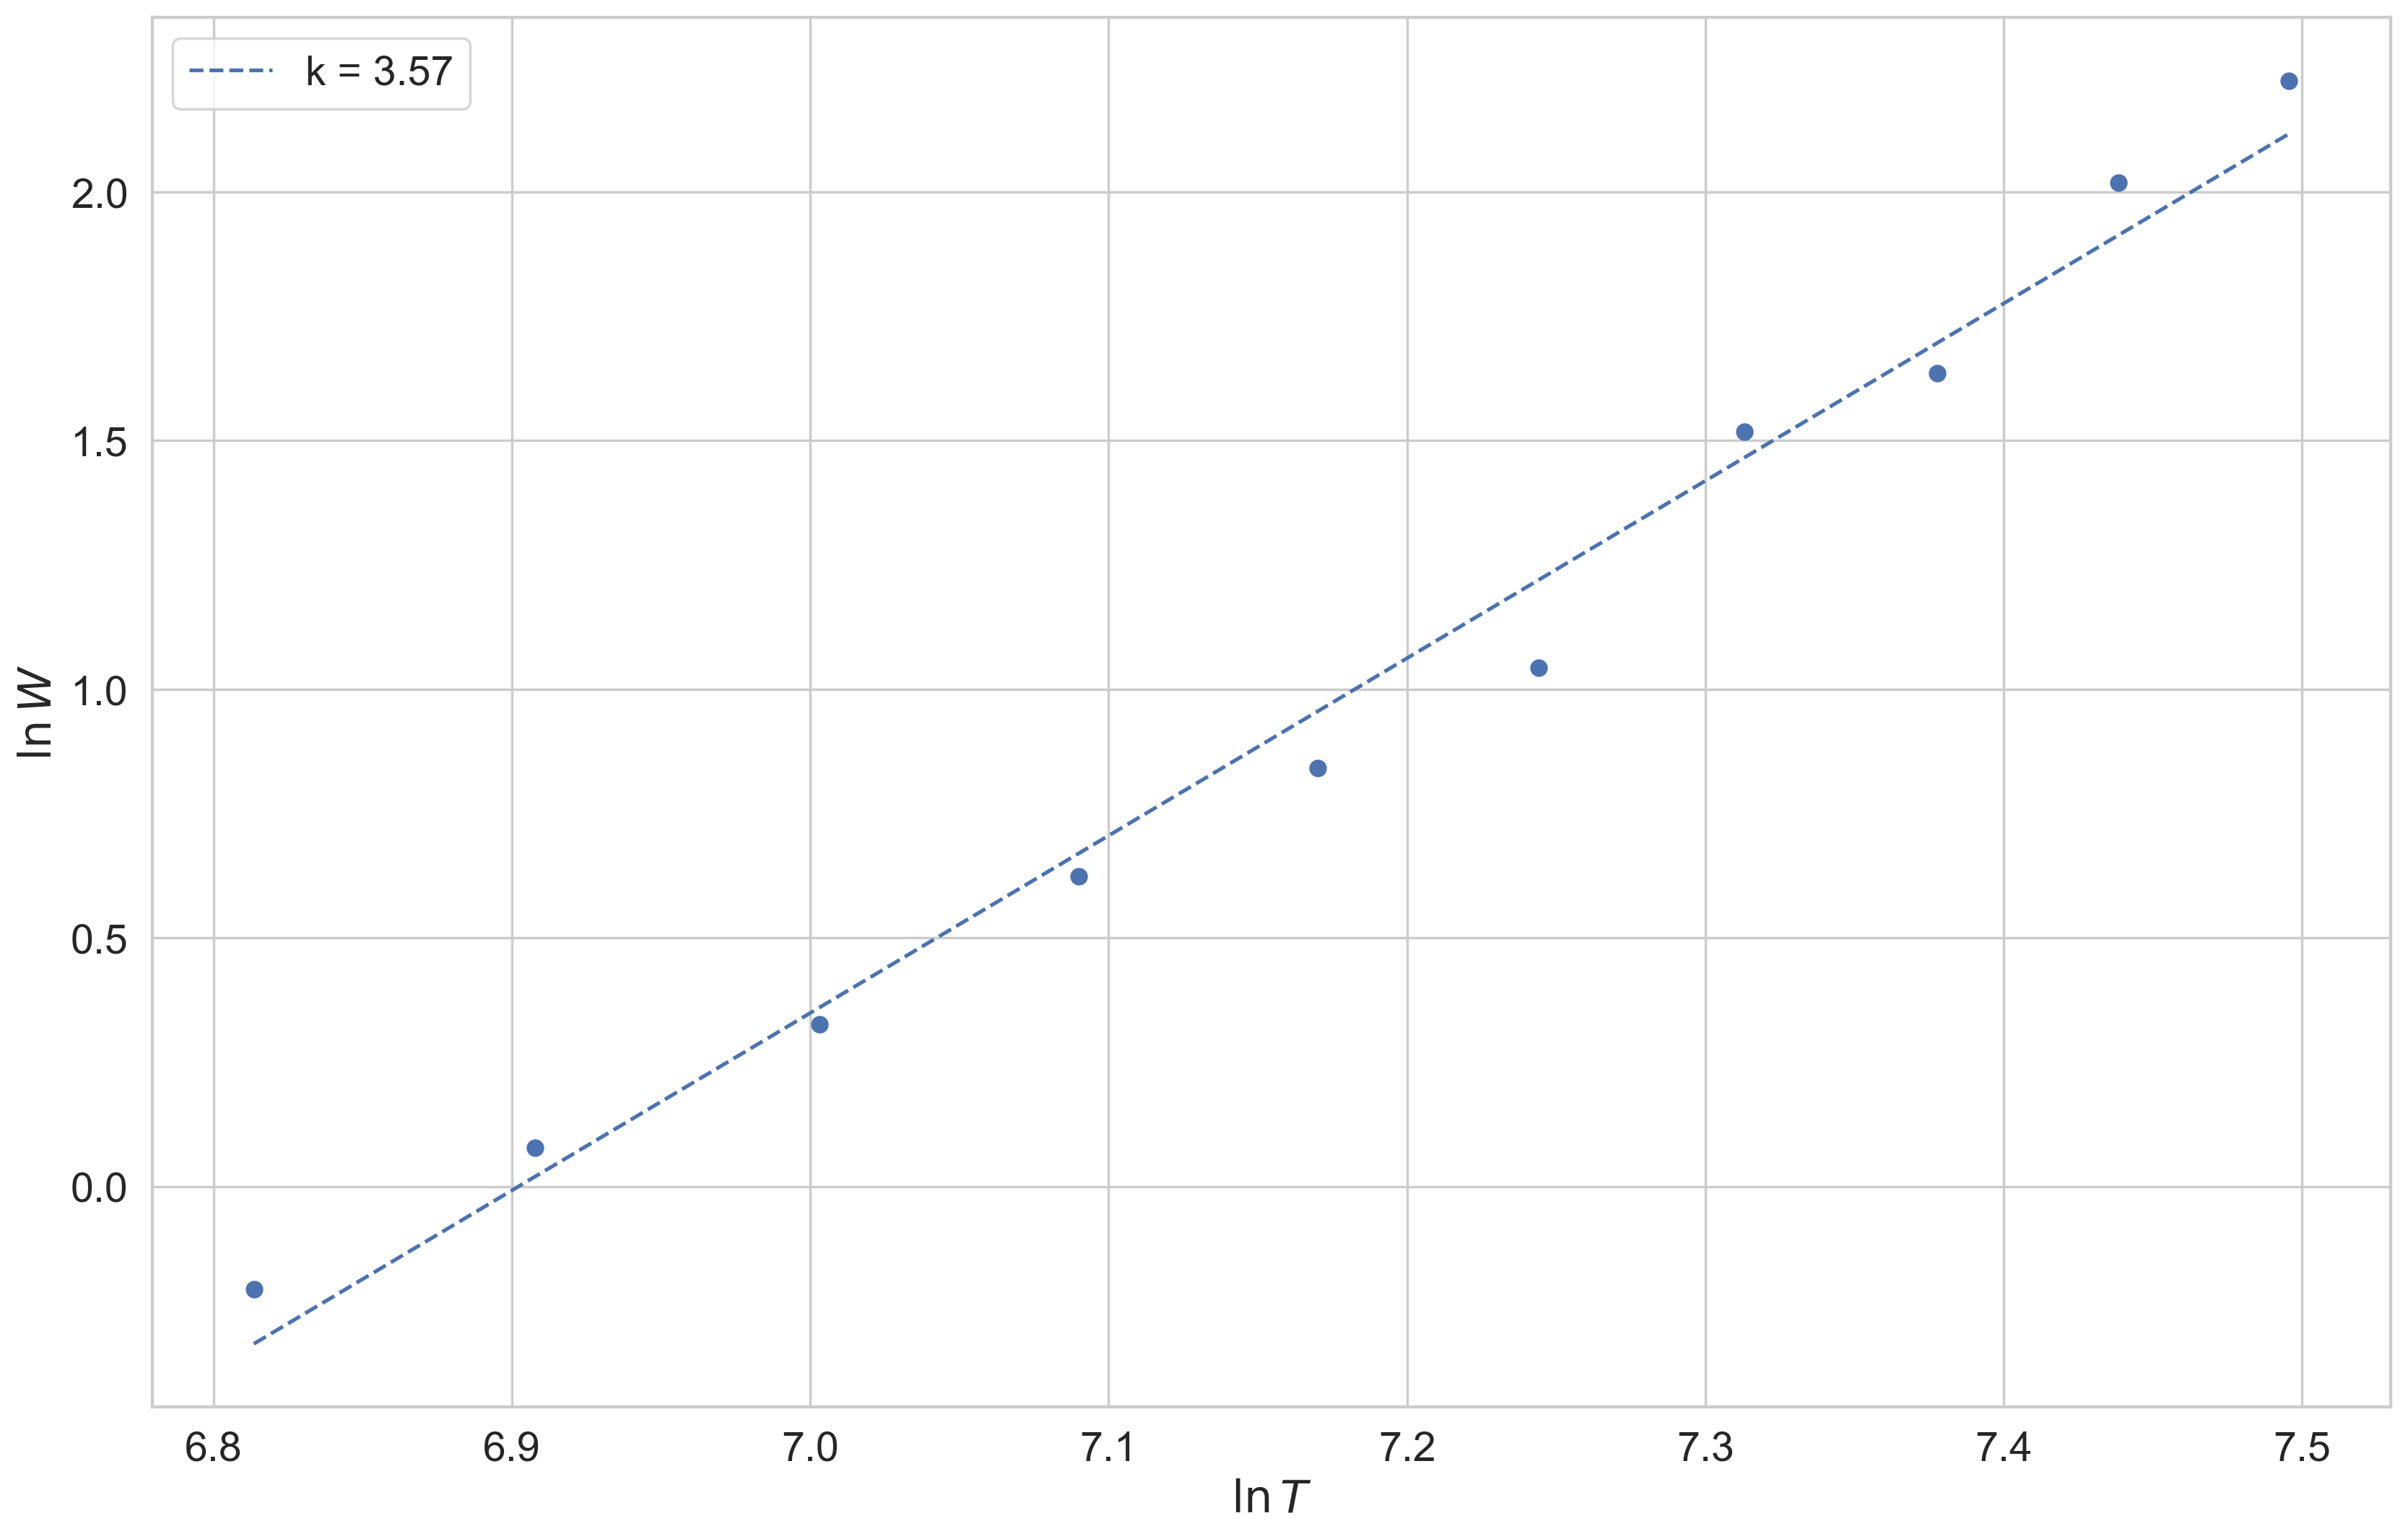

In [44]:
plt.figure(figsize = (16,10), dpi= 250)
plt.scatter(x, y_raw)
plt.plot(x, y, linestyle= '--', label = f'k = {pn[0]:.2f}')
plt.xlabel('$\ln T$')
plt.ylabel('$\ln W$')
plt.legend()
plt.savefig('plot')